# Support Vector Machines 

#### Fraud in Wine Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


The unique variables in the target column we are trying to predict

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Countplot that displays the count per category of Legit vs Fraud

<Axes: xlabel='quality', ylabel='count'>

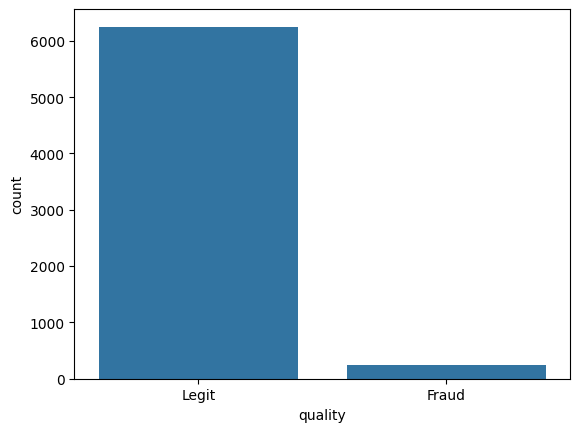

In [5]:
sns.countplot(df, x='quality')

In [6]:
# inbalanced target

Finding out if there is a difference between red and white wine when it comes to fraud

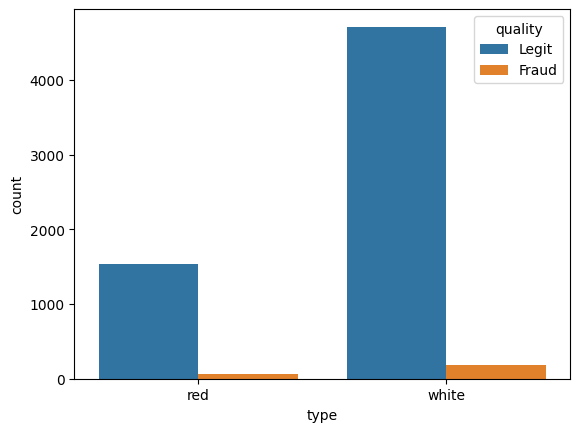

In [7]:
sns.countplot(df, x='type', hue='quality');

What percentage of red wines are Fraud? What percentage of white wines are fraud?

In [8]:
n_red = len(df[df['type']=='red'])
n_white = len(df[df['type']=='white'])

In [9]:
len(df[(df['type']=='red') & (df['quality']=='Fraud')])/n_red * 100

3.9399624765478425

In [10]:
len(df[(df['type']=='white') & (df['quality']=='Fraud')])/n_white * 100

3.7362188648427925

Calculating the correlation between the various features and the "quality" column

In [11]:
df['quality'] = df['quality'].map({'Legit':0, 'Fraud':1})
df['type'] = df['type'].map({'white':0, 'red':1})

In [12]:
corr_df = df.corr()['quality'].sort_values()
corr_df

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
type                    0.004598
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
quality                 1.000000
Name: quality, dtype: float64

In [13]:
# for most features there is very small corr value

Creating a bar plot of the correlation values to Fraudlent wine

In [14]:
corr_df.values[:-1]

array([-0.08520433, -0.06178946, -0.05114074, -0.04875596, -0.0352524 ,
       -0.03404621,  0.00459807,  0.01635128,  0.02010727,  0.02179396,
        0.03449946,  0.15122798])

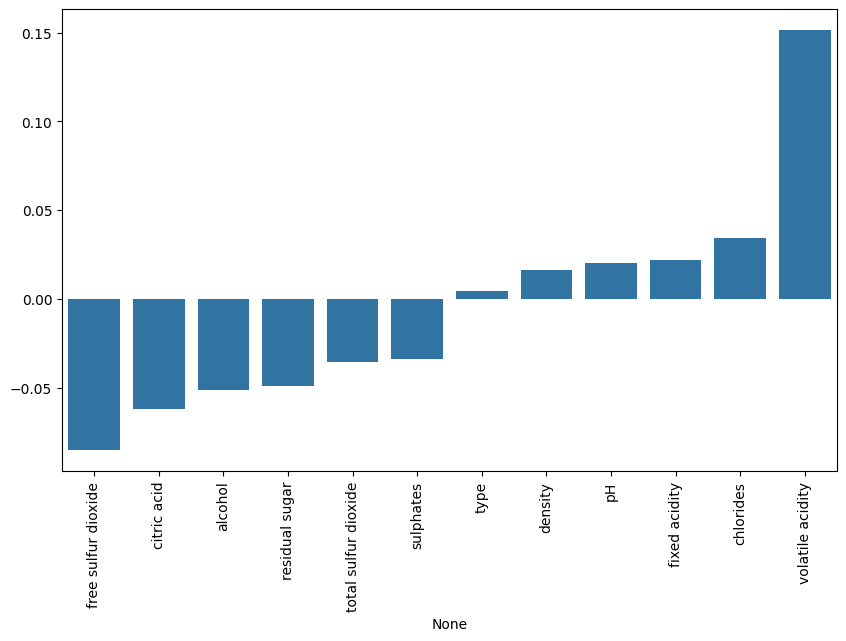

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index[:-1], y=corr_df.values[:-1])
plt.xticks(rotation=90)
plt.show()

Creating a clustermap

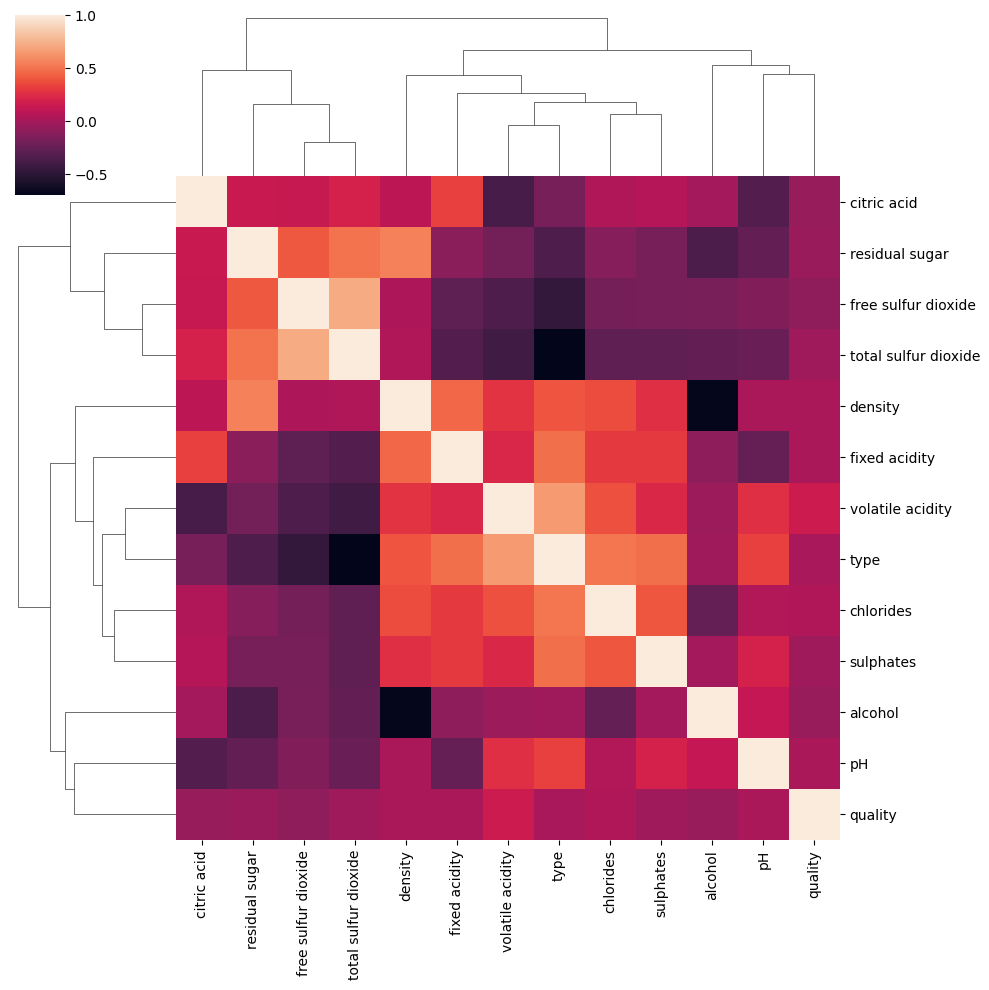

In [16]:
sns.clustermap(df.corr())

----
## Machine Learning Model

Separating out the data into X features and y target label ("quality" column)

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

Performing a Train|Test split on the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Scaling the X train and X test data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Creating an instance of a Support Vector Machine classifier

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC(class_weight='balanced')

Using a GridSearchCV to run a grid search for the best C and gamma parameters

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C': [0.01, 0.1, 0.2, 0.5, 0.7, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2,3,4],
              'gamma': ['scale', 'auto']}

In [27]:
grid_model = GridSearchCV(svm_model, param_grid)

In [28]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 1],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [29]:
grid_model.best_params_

{'C': 0.01, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}

In [30]:
y_pred = grid_model.predict(scaled_X_test)

Displaying the confusion matrix and classification report for your model

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test, y_pred)

array([[595,  28],
       [ 19,   8]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       623
           1       0.22      0.30      0.25        27

    accuracy                           0.93       650
   macro avg       0.60      0.63      0.61       650
weighted avg       0.94      0.93      0.93       650



In [34]:
# Model does not performs well